# Chronic diseases forecasting

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option("display.max_columns", 26)

## Data Loading

In [2]:
df = pd.read_csv("kidney_disease.csv").drop("id", axis=1)
df.columns = [
    "age",
    "blood_pressure",
    "specific_gravity",
    "albumin",
    "sugar",
    "red_blood_cells",
    "pus_cell",
    "pus_cell_clumps",
    "bacteria",
    "blood_glucose_random",
    "blood_urea",
    "serum_creatinine",
    "sodium",
    "potassium",
    "haemoglobin",
    "packed_cell_volume",
    "white_blood_cell_count",
    "red_blood_cell_count",
    "hypertension",
    "diabetes_mellitus",
    "coronary_artery_disease",
    "appetite",
    "peda_edema",
    "aanemia",
    "class",
]
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [5]:
df["packed_cell_volume"] = pd.to_numeric(df["packed_cell_volume"], errors="coerce")
df["white_blood_cell_count"] = pd.to_numeric(df["white_blood_cell_count"], errors="coerce")
df["red_blood_cell_count"] = pd.to_numeric(df["red_blood_cell_count"], errors="coerce")

cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

df["diabetes_mellitus"].replace(to_replace={"\tno": "no", "\tyes": "yes", " yes": "yes"}, inplace=True)

df["coronary_artery_disease"] = df["coronary_artery_disease"].replace(to_replace="\tno", value="no")

df["class"] = df["class"].replace(to_replace={"ckd\t": "ckd", "notckd": "not ckd"})


df["class"] = df["class"].map({"ckd": 0, "not ckd": 1})
df["class"] = pd.to_numeric(df["class"], errors="coerce")

## Data Exploration

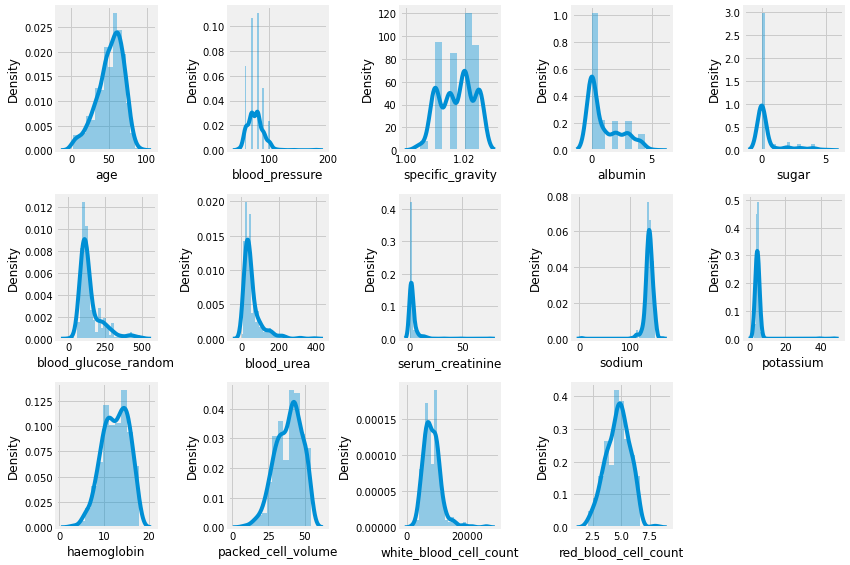

In [6]:
plt.figure(figsize = (12, 8))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

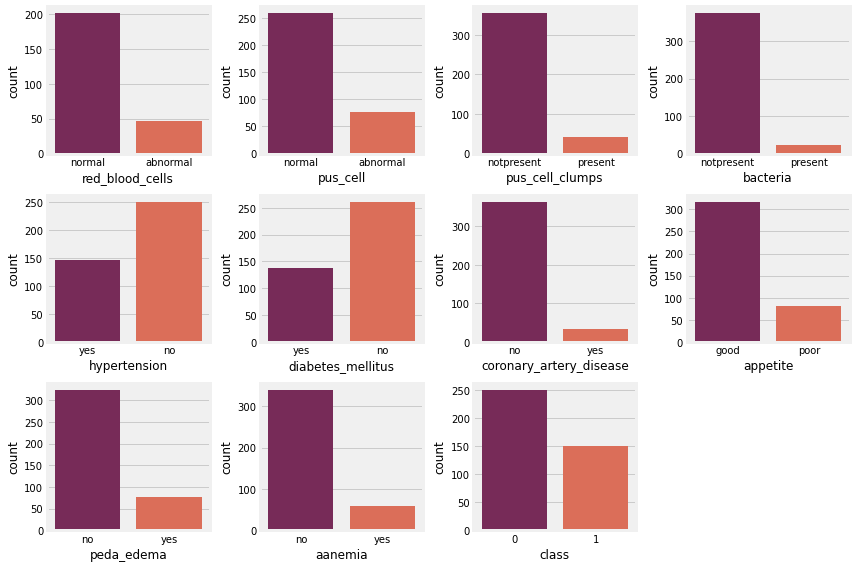

In [7]:
plt.figure(figsize = (12, 8))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## Missing Values

In [8]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)
    
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
    
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

## Data Spliting

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## KNN Predictor

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7928571428571428
Test Accuracy of KNN is 0.6666666666666666 

Confusion Matrix :- 
[[49 23]
 [17 31]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71        72
           1       0.57      0.65      0.61        48

    accuracy                           0.67       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.68      0.67      0.67       120



## Randomforest Predictor

In [11]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



## Feature Importances

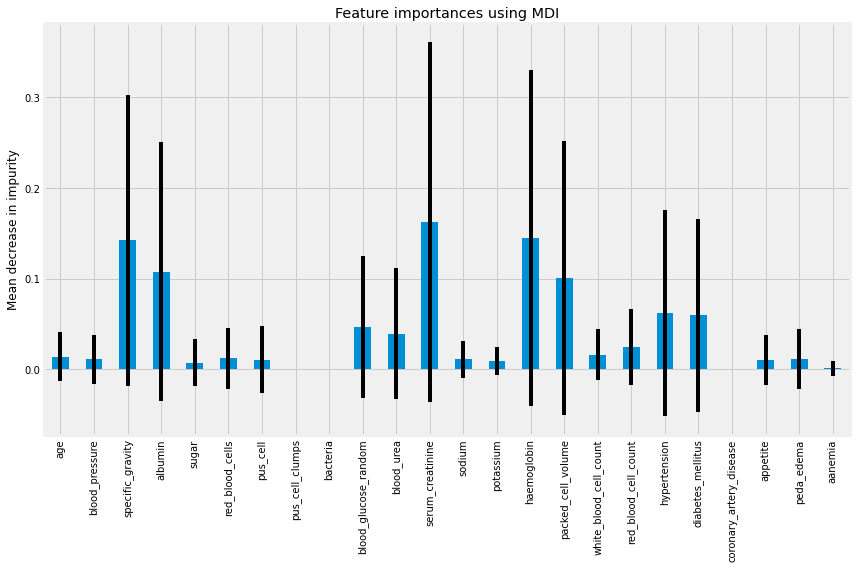

In [12]:
importances = rd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rd_clf.estimators_], axis=0)


forest_importances = pd.Series(importances, index=X_train.columns)


fig, ax = plt.subplots(figsize = (12, 8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [14]:
import joblib

In [24]:
joblib.dump(rd_clf, "./random_forest.joblib")

['./random_forest.joblib']

In [22]:
X_train1=X_train.loc[:,["age","blood_pressure","albumin","serum_creatinine","diabetes_mellitus","haemoglobin","packed_cell_volume","coronary_artery_disease"]]

In [23]:
rd_clf.fit(X_train1, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [25]:
X_train1

,age,blood_pressure,albumin,serum_creatinine,diabetes_mellitus,haemoglobin,packed_cell_volume,coronary_artery_disease
92,71.0,70.0,3.0,3.6,1,10.4,33.0,1
223,71.0,90.0,0.0,1.3,1,13.0,38.0,0
234,37.0,100.0,0.0,1.3,0,15.0,44.0,0
232,50.0,90.0,1.0,0.7,0,15.5,52.0,0
377,64.0,70.0,0.0,0.7,0,13.8,49.0,0
...,...,...,...,...,...,...,...,...
323,43.0,80.0,0.0,1.1,0,15.9,45.0,0
192,46.0,110.0,0.0,0.9,0,11.9,39.0,0
117,6.0,70.0,0.0,1.3,0,12.5,37.0,0
47,11.0,80.0,3.0,0.8,0,15.0,45.0,0
